In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import re
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'SimHei'

In [2]:
name = ['content','types']
df_news = pd.read_csv('../data/news.csv',names=name)
df_news

,content,types
0,据英国媒体、彭博社报道，德国车企宝马集团15日表示，将在明年结束在英国牛津工厂生产MINI电...,国际
1,今天下午，中国共产党第二十次全国代表大会新闻发言人孙业礼在人民大会堂举行新闻发布会。\n\n...,国内


In [3]:
# 数据清洗
content = df_news['content'].values.tolist()
res_list = []
for new in content:
    res = re.sub(u'[^\u4e00-\u9fa5]','',new)
    res_list.append(res)
df_news['re_content'] = res_list
df_news

,content,types,re_content
0,据英国媒体、彭博社报道，德国车企宝马集团15日表示，将在明年结束在英国牛津工厂生产MINI电...,国际,据英国媒体彭博社报道德国车企宝马集团日表示将在明年结束在英国牛津工厂生产电动车型并将在明年年...
1,今天下午，中国共产党第二十次全国代表大会新闻发言人孙业礼在人民大会堂举行新闻发布会。\n\n...,国内,今天下午中国共产党第二十次全国代表大会新闻发言人孙业礼在人民大会堂举行新闻发布会日本共同社记...


In [4]:
# 利用jieba进行中文分词 --> HMM 隐马尔可夫链
import jieba
content_s = []
res = df_news['re_content'].values.tolist()
for new in res:
    current_segment = jieba.lcut(new)
    content_s.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 0.343 seconds.
Prefix dict has been built successfully.


In [5]:
# 制作df对象专门用于展示分词之后的结果
df_content = pd.DataFrame({'content_s':content_s})
df_content

,content_s
0,"[据, 英国, 媒体, 彭博社, 报道, 德国, 车企, 宝马, 集团, 日, 表示, 将,..."
1,"[今天下午, 中国共产党, 第二十次, 全国代表大会, 新闻, 发言人, 孙业, 礼, 在,..."


In [6]:
# 加载停用词表
stopwords = pd.read_csv('../data/stopwords.txt',index_col=False,sep='\t',quoting=3,names=['stopwords'])
stopwords.head(3)

,stopwords
0,!
1,""""
2,#


In [7]:
# 去停用词
def drop_stopwords(contents,stopwors):
    content_clean = []
    all_words = []
    for new in contents:
        line_clean = []
        for words in new:
            if words in stopwords:
                continue
            line_clean.append(words)
            all_words.append(words)
        content_clean.append(line_clean)
    return content_clean,all_words

In [12]:
# 清洗后的新闻数据
contents = df_content['content_s'].values.tolist()
# 停用词
res = stopwords['stopwords'].values.tolist()
contents_claen,all_words = drop_stopwords(contents,res)

In [13]:
df_content = pd.DataFrame({'contents_clean':contents_claen})
df_content

,contents_clean
0,"[据, 英国, 媒体, 彭博社, 报道, 德国, 车企, 宝马, 集团, 日, 表示, 将,..."
1,"[今天下午, 中国共产党, 第二十次, 全国代表大会, 新闻, 发言人, 孙业, 礼, 在,..."


In [14]:
df_all_words = pd.DataFrame({'all_words':all_words})
df_all_words.head(n=2)

,all_words
0,据
1,英国


In [15]:
words_count = df_all_words.groupby(by=['all_words'])['all_words'].count()
words_count = words_count.sort_values(ascending=False)
res = dict(words_count)
words = res.keys()
count = res.values()
words_count = pd.DataFrame({
    'words':words,
    'count':count
})
words_count.head(n=10)

,words,count
0,的,136
1,在,49
2,中国,43
3,是,36
4,将,35
5,美国,33
6,和,27
7,战略,22
8,中,22
9,宝马,20


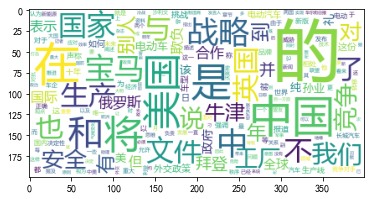

In [26]:
# 绘制词云图
from wordcloud import WordCloud
wordclouds = WordCloud(font_path='C:\\Windows\\Fonts\\msyh.ttc',background_color='white',max_font_size=80)
# res
wordclouds_pic = wordclouds.fit_words(res)
plt.imshow(wordclouds_pic)

In [35]:
content_array = np.array(contents_claen)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20660\2169381436.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  content_array = np.array(contents_claen)


['据',
 '英国',
 '媒体',
 '彭博社',
 '报道',
 '德国',
 '车企',
 '宝马',
 '集团',
 '日',
 '表示',
 '将',
 '在',
 '明年',
 '结束',
 '在',
 '英国牛津',
 '工厂',
 '生产',
 '电动车',
 '型',
 '并',
 '将',
 '在',
 '明年',
 '年底',
 '前',
 '把',
 '该',
 '生产线',
 '转移',
 '到',
 '中国',
 '报道',
 '称',
 '此举',
 '将',
 '对',
 '英国',
 '新能源',
 '汽车产业',
 '造成',
 '重大',
 '打击',
 '生产线',
 '效率',
 '不行',
 '英国',
 '泰晤士报',
 '日',
 '报道',
 '称',
 '宝马',
 '品牌',
 '的',
 '新任',
 '负责人',
 '斯蒂芬',
 '妮',
 '沃斯特',
 '表示',
 '由于',
 '牛津',
 '工厂',
 '没有',
 '为',
 '电动汽车',
 '做好',
 '准备',
 '宝马',
 '下一代',
 '纯电',
 '车型',
 '将',
 '改',
 '在',
 '中国',
 '生产',
 '作为',
 '宝马',
 '与',
 '中国',
 '长城汽车',
 '合资',
 '项目',
 '的',
 '一部分',
 '沃斯特',
 '称该',
 '决定',
 '与',
 '英国',
 '脱',
 '欧后',
 '的',
 '供应',
 '限制',
 '无关',
 '但',
 '由于',
 '牛津',
 '工厂',
 '必须',
 '在',
 '同',
 '一条',
 '生产线',
 '上',
 '同时',
 '生产',
 '电动车',
 '和',
 '燃油',
 '车',
 '导致',
 '运行',
 '效率',
 '不高',
 '因此',
 '公司',
 '决定',
 '牛津',
 '工厂',
 '自',
 '明年',
 '起',
 '将',
 '专注',
 '于',
 '制造',
 '汽油',
 '动力',
 '的',
 '车型',
 '除纯电',
 '将',
 '在',
 '中国',
 '生产',
 '之外',
 '宝马',
 '旗下',
 '另',
 '一款',
 '纯电版',
 '将

In [ ]:
x = df_content.head().values
# # tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(x)